In [200]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Dataset01.csv'  # Update with the actual path of your file

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


In [201]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Print the number of null values for each column
print(null_counts)

time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64


In [202]:
df['city'].unique()

array(['Colombo', 'Mount Lavinia', 'Kesbewa', 'Moratuwa', 'Maharagama',
       'Ratnapura', 'Kandy', 'Negombo', 'Sri Jayewardenepura Kotte',
       'Kalmunai', 'Trincomalee', 'Galle', 'Jaffna', 'Athurugiriya',
       'Weligama', 'Matara', 'Kolonnawa', 'Gampaha', 'Puttalam',
       'Badulla', 'Kalutara', 'Bentota', 'Matale', 'Mannar', 'Pothuhera',
       'Kurunegala', 'Mabole', 'Hatton', 'Hambantota', 'Oruwala'],
      dtype=object)

In [203]:
## Data types
# List data types of all features
data_types = df.dtypes

# Print data types
print(data_types)

time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                  float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                     float64
country                        object
city                           object
dtype: object


## Encoding Non neumerical variables

#### City

In [204]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Fit and transform the 'city' column
df['city_encoded'] = label_encoder.fit_transform(df['city'])

## Date

In [205]:
#### Spliting 'time' which actually had date into year, month and day

# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Extract year, month, and day into separate columns
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

## Time
Time appears to be in UTC therefore added 5 hours and 30 minutes to each value

In [206]:
# Convert the 'sunrise' column to datetime format
df['sunrise'] = pd.to_datetime(df['sunrise'])


# Define a Timedelta of 5 hours and 30 minutes
time_delta = pd.Timedelta(hours=5, minutes=30)

# Add the time delta to the 'datetime' column
df['sunrise'] += time_delta

df['sunrise_hour'] = df['sunrise'].dt.hour
df['sunrise_minute'] = df['sunrise'].dt.minute

In [207]:
# Convert the 'sunset' column to datetime format
df['sunset'] = pd.to_datetime(df['sunset'])

# Add the time delta to the 'datetime' column
df['sunset'] += time_delta

df['sunset_hour'] = df['sunset'].dt.hour
df['sunset_minute'] = df['sunset'].dt.minute

In [208]:
# Drop the specified columns
columns_to_drop = ['time', 'sunrise', 'sunset','snowfall_sum', 'country']
df.drop(columns=columns_to_drop, inplace=True)

In [209]:
df.head()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,...,elevation,city,city_encoded,year,month,day,sunrise_hour,sunrise_minute,sunset_hour,sunset_minute
0,2,30.0,22.7,26.1,34.4,25.2,29.2,20.92,0.0,0.0,...,16.0,Colombo,3,2010,1,1,6,22,18,5
1,51,29.9,23.5,26.2,33.8,26.2,29.8,17.71,0.1,0.1,...,16.0,Colombo,3,2010,1,2,6,22,18,6
2,51,29.5,23.2,26.0,34.3,26.3,29.9,17.76,0.6,0.6,...,16.0,Colombo,3,2010,1,3,6,23,18,6
3,2,28.9,21.9,25.3,31.6,23.4,27.8,16.50,0.0,0.0,...,16.0,Colombo,3,2010,1,4,6,23,18,7
4,1,28.1,21.3,24.5,30.1,23.1,26.1,23.61,0.0,0.0,...,16.0,Colombo,3,2010,1,5,6,23,18,7


In [210]:
# List data types of all features
data_types = df.dtypes

# Print data types
print(data_types)

weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                     float64
city                           object
city_encoded                    int64
year                            int64
month                           int64
day                             int64
sunrise_hour                    int64
sunrise_minute                  int64
sunset_hour                     int64
sunset_minut

## Dimensionality Reduction

## calculating total sunlight time

In [211]:
# Calculate sun_time
df['sun_time'] = (df['sunset_hour'] * 60 + df['sunset_minute']) - (df['sunrise_hour'] * 60 + df['sunrise_minute'])

<ipython-input-212-74b4426b4314>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


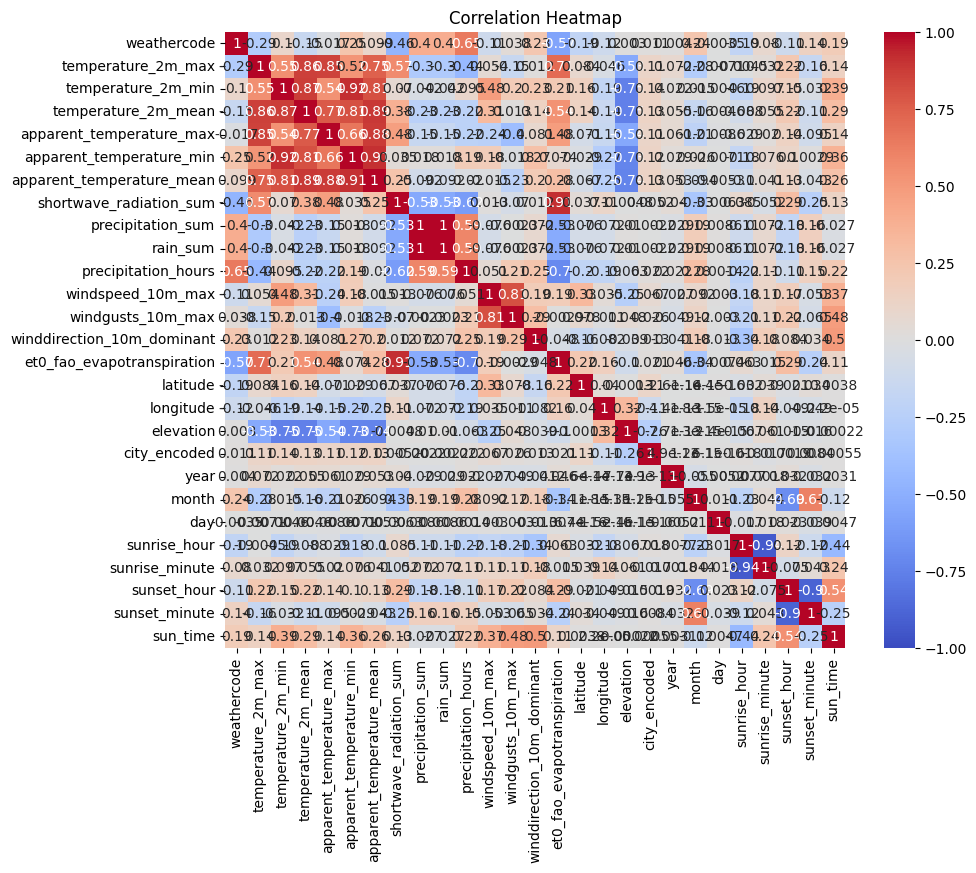

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (replace 'df' with your DataFrame's name)
# df = pd.read_csv('Dataset01.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [213]:
# Define the file path
file_path = 'output_data.csv'  # Change to your desired file path and name

# Export the DataFrame to a CSV file
df.to_csv(file_path, index=False)

In [214]:
columns = ['weathercode','temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant','elevation',
       'et0_fao_evapotranspiration','sunrise_hour', 'sunrise_minute', 'sunset_hour', 'sunset_minute']

avg = df.groupby('city')[columns].mean().reset_index()
# Calculate sun_time
avg['sun_time'] = (avg['sunset_hour'] * 60 + avg['sunset_minute']) - (avg['sunrise_hour'] * 60 + avg['sunrise_minute'])

In [215]:
avg.head()

,city,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,...,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,elevation,et0_fao_evapotranspiration,sunrise_hour,sunrise_minute,sunset_hour,sunset_minute,sun_time
0,Athurugiriya,48.833808,29.578234,24.169589,26.537551,34.905960,28.469304,31.110456,17.886115,6.821155,...,14.215846,33.862897,181.927380,27.0,3.724849,5.636493,27.987592,17.794345,25.962164,727.445688
1,Badulla,44.409276,27.821237,20.216477,23.658706,31.260232,22.503702,26.309337,18.925189,5.090948,...,10.987693,33.897030,174.524817,652.0,3.982795,5.377746,39.048820,17.747559,24.289463,727.429414
2,Bentota,50.491050,28.919854,24.469772,26.484418,34.421786,28.988120,31.267413,17.812541,7.184967,...,14.319650,32.960557,199.180228,10.0,3.607638,5.633238,27.966233,17.796583,25.552075,727.386493
3,Colombo,50.491050,29.711229,24.430635,26.715745,35.115216,28.907852,31.438080,17.812541,7.184967,...,14.319650,32.960557,199.180228,16.0,3.683041,5.652970,27.409886,17.798413,26.091741,727.408462
4,Galle,50.867372,29.795993,25.043796,27.115622,35.335598,29.157567,31.748454,19.905106,5.711188,...,17.598413,36.622193,209.616965,15.0,4.029508,5.604557,28.880797,17.791497,25.019935,727.355574


In [216]:
# List all features (columns) in the DataFrame
features = df.columns.tolist()

# Print the list of features
print(features)

['weathercode', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum', 'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max', 'winddirection_10m_dominant', 'et0_fao_evapotranspiration', 'latitude', 'longitude', 'elevation', 'city', 'city_encoded', 'year', 'month', 'day', 'sunrise_hour', 'sunrise_minute', 'sunset_hour', 'sunset_minute', 'sun_time']


In [217]:
# Group by 'city' and check if there are multiple unique values for 'longitude' and 'latitude'
result = df.groupby('city').apply(lambda group: group['longitude'].nunique() > 1 or group['latitude'].nunique() > 1)

cities_with_different_coordinates = result[result].index.tolist()

print("Cities with different coordinates:", cities_with_different_coordinates)


Cities with different coordinates: []


## Finidings
Each city has unique longitude and latitude values, i.e. only one location per city is given as an entry, our decision is now to select the best city using AHP

In [218]:
alternatives = ['Colombo', 'Mount Lavinia', 'Kesbewa', 'Moratuwa', 'Maharagama',
       'Ratnapura', 'Kandy', 'Negombo', 'Sri Jayewardenepura Kotte',
       'Kalmunai', 'Trincomalee', 'Galle', 'Jaffna', 'Athurugiriya',
       'Weligama', 'Matara', 'Kolonnawa', 'Gampaha', 'Puttalam',
       'Badulla', 'Kalutara', 'Bentota', 'Matale', 'Mannar', 'Pothuhera',
       'Kurunegala', 'Mabole', 'Hatton', 'Hambantota', 'Oruwala']

criteria = ['weathercode', 'temperature_2m_max', 'temperature_2m_min',
            'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min',
            'apparent_temperature_mean', 'shortwave_radiation_sum', 'precipitation_sum',
            'rain_sum', 'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max',
            'winddirection_10m_dominant', 'et0_fao_evapotranspiration', 'latitude',
            'longitude', 'elevation', 'city', 'year', 'month', 'day', 'sun_time']

In [219]:
!pip install ahpy

In [220]:
import ahpy

#Feature Selection

In [221]:
windCriteria = ['temperature_2m_mean','rain_sum',
                'windspeed_10m_max', 'winddirection_10m_dominant',
                'elevation']

solarCriteria = ['temperature_2m_mean',
                'shortwave_radiation_sum',  'precipitation_hours',
                'et0_fao_evapotranspiration','sun_time']

In [222]:
import itertools
windPairs = list(itertools.combinations(windCriteria, 2))
print(windPairs)
nWP=len(windPairs)
print(nWP)

solarPairs = list(itertools.combinations(solarCriteria, 2))
print(solarPairs)
nSP = len(solarPairs)
print(nSP)

[('temperature_2m_mean', 'rain_sum'), ('temperature_2m_mean', 'windspeed_10m_max'), ('temperature_2m_mean', 'winddirection_10m_dominant'), ('temperature_2m_mean', 'elevation'), ('rain_sum', 'windspeed_10m_max'), ('rain_sum', 'winddirection_10m_dominant'), ('rain_sum', 'elevation'), ('windspeed_10m_max', 'winddirection_10m_dominant'), ('windspeed_10m_max', 'elevation'), ('winddirection_10m_dominant', 'elevation')]
10
[('temperature_2m_mean', 'shortwave_radiation_sum'), ('temperature_2m_mean', 'precipitation_hours'), ('temperature_2m_mean', 'et0_fao_evapotranspiration'), ('temperature_2m_mean', 'sun_time'), ('shortwave_radiation_sum', 'precipitation_hours'), ('shortwave_radiation_sum', 'et0_fao_evapotranspiration'), ('shortwave_radiation_sum', 'sun_time'), ('precipitation_hours', 'et0_fao_evapotranspiration'), ('precipitation_hours', 'sun_time'), ('et0_fao_evapotranspiration', 'sun_time')]
10


### Function to calculate wind values

In [223]:
# lept
print("Need the following number of values;")
print(nWP)

import random

def generate_random_array(size, min_value, max_value):
    if size <= 0 or max_value <= min_value:
        raise ValueError("Invalid input parameters")

    random_array = [random.randint(min_value, max_value) for _ in range(size)]
    return random_array

error = 10
while error > 0.1 :
  windParameters = generate_random_array(nWP, 1, 9)

  windComparison = dict(zip(windPairs, windParameters))
  wind  = ahpy.Compare(name='Wind', comparisons=windComparison, precision=3, random_index='saaty')
  error = wind.consistency_ratio
  if error < 0.1:
    finalWindValues = windParameters
    break;

print("final wind values :",finalWindValues)

# final wind values : [1, 2, 9, 4, 3, 8, 9, 2, 7, 3]

Need the following number of values;
10
final wind values : [1, 5, 9, 9, 2, 3, 7, 4, 6, 5]


### Setting importance values for wind

In [224]:
windValues = finalWindValues
# windValues = [1/2, 1/9, 1/6, 1, 1/8, 1/7, 1/2, 3, 8, 5]
windComparison = dict(zip(windPairs, windValues))
print(windComparison)

{('temperature_2m_mean', 'rain_sum'): 1, ('temperature_2m_mean', 'windspeed_10m_max'): 5, ('temperature_2m_mean', 'winddirection_10m_dominant'): 9, ('temperature_2m_mean', 'elevation'): 9, ('rain_sum', 'windspeed_10m_max'): 2, ('rain_sum', 'winddirection_10m_dominant'): 3, ('rain_sum', 'elevation'): 7, ('windspeed_10m_max', 'winddirection_10m_dominant'): 4, ('windspeed_10m_max', 'elevation'): 6, ('winddirection_10m_dominant', 'elevation'): 5}


In [225]:
wind  = ahpy.Compare(name='Wind', comparisons=windComparison, precision=3, random_index='saaty')

print(wind.target_weights)

weightsWind = wind.target_weights

print(wind.consistency_ratio)

{'temperature_2m_mean': 0.459, 'rain_sum': 0.275, 'windspeed_10m_max': 0.161, 'winddirection_10m_dominant': 0.075, 'elevation': 0.03}
0.094


###Function to calculate solar values

In [226]:
# lept
print("Need the following number of values;")
print(nSP)

error = 10
while error > 0.1 :
  solarParameters = generate_random_array(nSP, 1, 9)

  solarComparison = dict(zip(solarPairs, solarParameters))
  solar  = ahpy.Compare(name='Solar', comparisons=solarComparison, precision=3, random_index='saaty')
  error = solar.consistency_ratio
  if error < 0.1:
    finalSolarValues = solarParameters
    break;

print("final solar values :",finalSolarValues)


# final solar values : [2, 2, 6, 7, 4, 4, 9, 6, 7, 1]

Need the following number of values;
10
final solar values : [3, 6, 6, 9, 1, 1, 3, 1, 8, 5]


### Setting importance values for solar

In [227]:
solarValues = finalSolarValues
solarComparison = dict(zip(solarPairs, solarValues))
print(solarComparison)


{('temperature_2m_mean', 'shortwave_radiation_sum'): 3, ('temperature_2m_mean', 'precipitation_hours'): 6, ('temperature_2m_mean', 'et0_fao_evapotranspiration'): 6, ('temperature_2m_mean', 'sun_time'): 9, ('shortwave_radiation_sum', 'precipitation_hours'): 1, ('shortwave_radiation_sum', 'et0_fao_evapotranspiration'): 1, ('shortwave_radiation_sum', 'sun_time'): 3, ('precipitation_hours', 'et0_fao_evapotranspiration'): 1, ('precipitation_hours', 'sun_time'): 8, ('et0_fao_evapotranspiration', 'sun_time'): 5}


In [228]:
solar  = ahpy.Compare(name='Solar', comparisons=solarComparison, precision=3, random_index='saaty')

print(solar.target_weights)

weightsSolar = solar.target_weights

print(solar.consistency_ratio)



{'temperature_2m_mean': 0.555, 'precipitation_hours': 0.148, 'shortwave_radiation_sum': 0.133, 'et0_fao_evapotranspiration': 0.128, 'sun_time': 0.035}
0.062


# Calculating Suitablility_index

### All the parameters considered

In [229]:

# Combine keys of the two dictionaries into a single array
combined_keys = list(weightsWind.keys()) + list(weightsSolar.keys())

print(combined_keys)


['temperature_2m_mean', 'rain_sum', 'windspeed_10m_max', 'winddirection_10m_dominant', 'elevation', 'temperature_2m_mean', 'precipitation_hours', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'sun_time']


['windspeed_10m_max', 'winddirection_10m_dominant', 'elevation', 'rain_sum', 'temperature_2m_mean', 'temperature_2m_mean', 'shortwave_radiation_sum', 'precipitation_hours', 'sun_time', 'et0_fao_evapotranspiration']

## windspeed_10m_max

In [230]:
import pandas as pd
from itertools import combinations


# Extract city names and corresponding temperature values
city_names = avg['city']
temperature_values = avg['windspeed_10m_max']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    comparison_matrix[i][j] = temperature_values[j] / temperature_values[i]
    comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))

wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)
len_windspeed_10m_max=len(wind_city_Pairs)
print(len_windspeed_10m_max)

wind_windspeed_10m_max = dict(zip(wind_city_Pairs, flattened_upper_triangular))

windspeed_10m_max  = ahpy.Compare(name='windspeed_10m_max', comparisons=wind_windspeed_10m_max, precision=3, random_index='dd')

print(windspeed_10m_max.target_weights)

weightswindspeed_10m_max = windspeed_10m_max.target_weights

print(windspeed_10m_max.consistency_ratio)

[0.7729186908225071, 1.0073019856879362, 1.0073019856879362, 1.2379434242778502, 1.0, 1.389568019506304, 0.7123793197691638, 1.8647737500554478, 1.1183442536391877, 1.0073019856879362, 0.8289105975379586, 1.0073019856879362, 1.0, 1.0443313381536263, 1.0, 1.0073019856879362, 1.7097263937520297, 1.0334592066119959, 1.2379434242778502, 1.0073019856879362, 1.0073019856879362, 1.0, 1.0, 1.0443313381536263, 1.1866320574772016, 0.8568607614498654, 1.0, 1.5121334876819235, 1.2379434242778502, 1.3032444390961853, 1.3032444390961853, 1.6016476752043396, 1.293797150817821, 1.7978191445048184, 0.9216743342188817, 2.412638964741602, 1.4469106089918635, 1.3032444390961853, 1.0724421693773085, 1.3032444390961853, 1.293797150817821, 1.3511529098129242, 1.293797150817821, 1.3032444390961853, 2.212039136914404, 1.337086577001046, 1.6016476752043396, 1.3032444390961853, 1.3032444390961853, 1.293797150817821, 1.293797150817821, 1.3511529098129242, 1.5352611750330922, 1.1086040118114244, 1.293797150817821,

## winddirection_10m_dominant

In [231]:
# Extract city names and corresponding temperature values
city_names = avg['city']
temperature_values = avg['winddirection_10m_dominant']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    comparison_matrix[i][j] = temperature_values[j] / temperature_values[i]
    comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))

wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)
len_winddirection_10m_dominant=len(wind_city_Pairs)
print(len_winddirection_10m_dominant)

wind_winddirection_10m_dominant = dict(zip(wind_city_Pairs, flattened_upper_triangular))

winddirection_10m_dominant  = ahpy.Compare(name='winddirection_10m_dominant', comparisons=wind_winddirection_10m_dominant, precision=3, random_index='dd')

print(winddirection_10m_dominant.target_weights)

weightswinddirection_10m_dominant = winddirection_10m_dominant.target_weights

print(winddirection_10m_dominant.consistency_ratio)

[0.9593103409719853, 1.0948337069731817, 1.0948337069731817, 1.1522013070872303, 1.0, 1.0077407740774078, 0.9641887170083467, 0.8183148749657574, 0.7579406387843753, 1.0948337069731817, 0.9354652235409877, 1.0948337069731817, 1.0, 0.8986599281046117, 1.0, 1.0948337069731817, 0.8385149073913603, 0.9298086330372167, 1.1522013070872303, 1.0948337069731817, 1.0948337069731817, 1.0, 1.0, 0.8986599281046117, 0.8962123541546702, 1.2400120757417357, 1.0, 0.8920875938525529, 1.1522013070872303, 1.1412716617480454, 1.1412716617480454, 1.201072539174138, 1.0424155325864488, 1.0504846357189812, 1.0050852949541007, 0.8530241362108434, 0.7900890946473279, 1.1412716617480454, 0.9751434792135801, 1.1412716617480454, 1.0424155325864488, 0.9367770675692687, 1.0424155325864488, 1.1412716617480454, 0.8740809637700416, 0.9692469614109682, 1.201072539174138, 1.1412716617480454, 1.1412716617480454, 1.0424155325864488, 1.0424155325864488, 0.9367770675692687, 0.9342256784666956, 1.2926078483479493, 1.042415532

##elevation

In [232]:
# Extract city names and corresponding temperature values
city_names = avg['city']
temperature_values = avg['elevation']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    # check if either value is 0 to avoid division by 0
    if temperature_values[i] == 0 or temperature_values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = temperature_values[j] / temperature_values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))

wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)
len_elevation=len(wind_city_Pairs)
print(len_elevation)

wind_elevation = dict(zip(wind_city_Pairs, flattened_upper_triangular))

elevation  = ahpy.Compare(name='elevation', comparisons=wind_elevation, precision=3, random_index='dd')

print(elevation.target_weights)

weightselevation = elevation.target_weights

print(elevation.consistency_ratio)

[24.14814814814815, 0.37037037037037035, 0.5925925925925926, 0.5555555555555556, 0.5555555555555556, 0.4444444444444444, 47.44444444444444, 0.18518518518518517, 0.2962962962962963, 1, 18.88888888888889, 0.6666666666666666, 0.48148148148148145, 4.592592592592593, 0.5925925925925926, 0.9629629629629629, 0.2222222222222222, 13.925925925925926, 0.25925925925925924, 0.3333333333333333, 0.37037037037037035, 0.18518518518518517, 0.7407407407407407, 4.62962962962963, 1, 1.0, 0.25925925925925924, 0.25925925925925924, 0.18518518518518517, 0.015337423312883436, 0.024539877300613498, 0.023006134969325152, 0.023006134969325152, 0.018404907975460124, 1.9647239263803682, 0.007668711656441718, 0.012269938650306749, 1, 0.7822085889570553, 0.027607361963190184, 0.019938650306748466, 0.1901840490797546, 0.024539877300613498, 0.03987730061349693, 0.009202453987730062, 0.5766871165644172, 0.010736196319018405, 0.013803680981595092, 0.015337423312883436, 0.007668711656441718, 0.03067484662576687, 0.19171779

## rain_sum

In [233]:
# Extract city names and corresponding temperature values
city_names = avg['city']
temperature_values = avg['rain_sum']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    # check if either value is 0 to avoid division by 0
    if temperature_values[i] == 0 or temperature_values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = temperature_values[j] / temperature_values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))

wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)
len_rain_sum=len(wind_city_Pairs)
print(len_rain_sum)

wind_rain_sum = dict(zip(wind_city_Pairs, flattened_upper_triangular))

rain_sum  = ahpy.Compare(name='rain_sum', comparisons=wind_rain_sum, precision=3, random_index='dd')

print(rain_sum.target_weights)

weightsrain_sum = rain_sum.target_weights

print(rain_sum.consistency_ratio)

[0.7463468603874415, 1.0533358383433533, 1.0533358383433533, 0.8372757419601107, 1.0, 0.42912014505200874, 1.0475325651302603, 0.49256250596430956, 0.6146877087508349, 1.0533358383433533, 0.925520684225594, 1.0533358383433533, 1.0, 0.7845512453478385, 1.0, 1.0533358383433533, 0.44755880809237514, 0.7792161704361102, 0.8372757419601107, 1.0533358383433533, 1.0533358383433533, 1.0, 1.0, 0.7845512453478385, 0.6403402042179597, 1.1401791678595286, 1.0, 0.5639970417024526, 0.8372757419601107, 1.4113221268145333, 1.4113221268145333, 1.1218319341833454, 1.339859592202053, 0.5749607425550703, 1.4035465555338014, 0.6599645983753611, 0.823595222778508, 1.4113221268145333, 1.2400677665410695, 1.4113221268145333, 1.339859592202053, 1.0511885116533677, 1.339859592202053, 1.4113221268145333, 0.5996659620970868, 1.044040260357772, 1.1218319341833454, 1.4113221268145333, 1.4113221268145333, 1.339859592202053, 1.339859592202053, 1.0511885116533677, 0.857965964894055, 1.5276799948855442, 1.3398595922020

## temperature_2m_mean

In [234]:
# Extract city names and corresponding temperature values
city_names = avg['city']
temperature_values = avg['temperature_2m_mean']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    comparison_matrix[i][j] = temperature_values[j] / temperature_values[i]
    comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))

wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)
len_temperature_2m_mean=len(wind_city_Pairs)
print(len_temperature_2m_mean)

wind_temperature_2m_mean = dict(zip(wind_city_Pairs, flattened_upper_triangular))

temperature_2m_mean  = ahpy.Compare(name='temperature_2m_mean', comparisons=wind_temperature_2m_mean, precision=3, random_index='dd')

print(temperature_2m_mean.target_weights)

weightstemperature_2m_mean = temperature_2m_mean.target_weights

print(temperature_2m_mean.consistency_ratio)


[0.8915180754660865, 0.9979978322624954, 1.006714773882289, 1.021783155729097, 1.002506542305375, 1.028182120611443, 0.7676396956582393, 1.0468478122561484, 1.045051073673947, 0.9994113074952513, 0.8857162348821772, 1.0023624352859832, 1.0037605799847613, 0.9710919786047066, 1.006714773882289, 1.0004415193785614, 1.034862400792282, 0.9433644083257063, 0.9984316863740681, 1.0041906014628394, 1.005696826426161, 1.011466472888717, 0.994215023003466, 0.9612520753710373, 1.019989483253691, 0.9476546582594018, 1.005696826426161, 1.0424172879365559, 1.000358734495081, 1.1194364530867658, 1.1292140917681086, 1.1461160282082983, 1.124493793108192, 1.153293633529425, 0.8610478203225622, 1.1742306085144212, 1.172215238740497, 1.1210219231648872, 0.9934921784049346, 1.12433215082257, 1.1259004249128592, 1.0892566346420054, 1.1292140917681086, 1.1221774935472055, 1.1607867852272709, 1.0581551112494434, 1.1199230995424148, 1.1263827723715503, 1.1280722781760557, 1.134543988196674, 1.1151933430891903

## shortwave_radiation_sum

In [235]:
# Extract city names and corresponding temperature values
city_names = avg['city']
temperature_values = avg['shortwave_radiation_sum']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    # check if either value is 0 to avoid division by 0
    if temperature_values[i] == 0 or temperature_values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = temperature_values[j] / temperature_values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))

wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)
len_shortwave_radiation_sum=len(wind_city_Pairs)
print(len_shortwave_radiation_sum)

wind_shortwave_radiation_sum = dict(zip(wind_city_Pairs, flattened_upper_triangular))

shortwave_radiation_sum  = ahpy.Compare(name='shortwave_radiation_sum', comparisons=wind_shortwave_radiation_sum, precision=3, random_index='dd')

print(shortwave_radiation_sum.target_weights)

weightsshortwave_radiation_sum = shortwave_radiation_sum.target_weights

print(shortwave_radiation_sum.consistency_ratio)

[1.0580939162365994, 0.9958865273392568, 0.9958865273392568, 1.1128803588930687, 1.0, 1.1042182855227005, 1.0306450244483734, 1.1089005180821518, 1.085884223184978, 0.9958865273392568, 1.0125250005288409, 0.9958865273392568, 1.0, 1.0150044115569825, 1.0, 0.9958865273392568, 1.0795194803392862, 1.0246231752428743, 1.1128803588930687, 0.9958865273392568, 0.9958865273392568, 1.0, 1.0, 1.0150044115569825, 1.0459808429929256, 1.0016427050543772, 1.0, 1.110115146300149, 1.1128803588930687, 0.9412080648581742, 0.9412080648581742, 1.0517784308328058, 0.945095690141357, 1.0435919426227827, 0.974058170671791, 1.0480171004349597, 1.026264499324618, 0.9412080648581742, 0.9569330141601826, 0.9412080648581742, 0.945095690141357, 0.9592762948369683, 0.945095690141357, 0.9412080648581742, 1.0202492082922967, 0.9683669469409929, 1.0517784308328058, 0.9412080648581742, 0.9412080648581742, 0.945095690141357, 0.945095690141357, 0.9592762948369683, 0.9885519866830373, 0.9466482036084223, 0.945095690141357,

## precipitation_hours

In [236]:
# Extract city names and corresponding temperature values
city_names = avg['city']
temperature_values = avg['precipitation_hours']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    # check if either value is 0 to avoid division by 0
    if temperature_values[i] == 0 or temperature_values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = temperature_values[j] / temperature_values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))

wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)
len_precipitation_hours=len(wind_city_Pairs)
print(len_precipitation_hours)

wind_precipitation_hours = dict(zip(wind_city_Pairs, flattened_upper_triangular))

precipitation_hours  = ahpy.Compare(name='precipitation_hours', comparisons=wind_precipitation_hours, precision=3, random_index='dd')

print(precipitation_hours.target_weights)

weightsprecipitation_hours = precipitation_hours.target_weights

print(precipitation_hours.consistency_ratio)

[0.5417714947486123, 1.042390479613434, 1.042390479613434, 1.0067688990056307, 1.0, 0.4317319595862785, 0.8667185815262969, 0.48318757238129467, 0.58585919092688, 1.042390479613434, 0.7255700650932471, 1.042390479613434, 1.0, 0.7378099916137535, 1.0, 1.042390479613434, 0.463000678886626, 0.6349986022922408, 1.0067688990056307, 1.042390479613434, 1.042390479613434, 1.0, 1.0, 0.7378099916137535, 0.6945409528373467, 1.063555768539595, 1.0, 0.5200271554650374, 1.0067688990056307, 1.9240408358825047, 1.9240408358825047, 1.858290642391184, 1.8457966314082481, 0.7968893966756347, 1.5997862381601737, 0.8918659934397227, 1.0813769210923967, 1.9240408358825047, 1.3392547819997787, 1.9240408358825047, 1.8457966314082481, 1.361847197140014, 1.8457966314082481, 1.9240408358825047, 0.8546050934286662, 1.172078281059964, 1.858290642391184, 1.9240408358825047, 1.9240408358825047, 1.8457966314082481, 1.8457966314082481, 1.361847197140014, 1.2819813511222495, 1.9631076548851951, 1.8457966314082481, 0.95

## sun_time

In [237]:
# Extract city names and corresponding temperature values
city_names = avg['city']
temperature_values = avg['sun_time']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    # check if either value is 0 to avoid division by 0
    if temperature_values[i] == 0 or temperature_values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = temperature_values[j] / temperature_values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))

wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)
len_sun_time=len(wind_city_Pairs)
print(len_sun_time)

wind_sun_time = dict(zip(wind_city_Pairs, flattened_upper_triangular))

sun_time  = ahpy.Compare(name='sun_time', comparisons=wind_sun_time, precision=3, random_index='dd')

print(sun_time.target_weights)

weightssun_time = sun_time.target_weights

print(sun_time.consistency_ratio)

[0.9999776294048051, 0.9999186269599785, 0.9999488272634913, 0.9998761228291084, 1.0000005592648795, 0.9998657764288305, 0.9999460309390923, 1.0002477543417827, 1.0000542486933472, 0.9999351252739349, 0.9999944073512012, 0.9999916110268016, 0.9999644866801283, 1.000063756196305, 0.9999723163884462, 0.9999851794806833, 1.000221468892429, 1.000058163547506, 0.9998434058336355, 0.9999628088854884, 0.999964207047688, 1.000015939049076, 0.9999876961726428, 1.0000595617097061, 1.0000822119373411, 0.9999826627887237, 0.9999670033720871, 1.0001384180577682, 0.9998540318663536, 0.999940996235224, 0.9999711972143508, 0.99989849115349, 1.0000229303730406, 0.9998881445217518, 0.9999684008273949, 1.0002701309799684, 1.0000766210025998, 0.9999574949182658, 1.000016778321737, 1.0000139819347806, 0.999986856981306, 1.0000861287182508, 0.9999946868647831, 1.0000075502447818, 1.0002438449425803, 1.000080535944338, 0.9998657734261022, 0.9999851791491321, 0.9999865773426101, 1.0000383105012995, 1.00001006

## et0_fao_evapotranspiration

In [238]:
# Extract city names and corresponding temperature values
city_names = avg['city']
temperature_values = avg['et0_fao_evapotranspiration']

# Initialize an empty matrix to store comparisons
matrix_size = len(city_names)
comparison_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Fill the matrix with pairwise comparisons
for i, j in combinations(range(matrix_size), 2):
    # check if either value is 0 to avoid division by 0
    if temperature_values[i] == 0 or temperature_values[j] == 0:
        comparison_matrix[i][j] = 1
        comparison_matrix[j][i] = 0.1
    else:
        comparison_matrix[i][j] = temperature_values[j] / temperature_values[i]
        comparison_matrix[j][i] = 1/comparison_matrix[i][j]

for i in range(matrix_size):
  comparison_matrix[i][i] = 1

# Print the comparison matrix
# for row in comparison_matrix:
#   print(row)

# Flatten the upper triangular part of the matrix (excluding diagonal)
flattened_upper_triangular = [comparison_matrix[i][j] for i in range(len(comparison_matrix)) for j in range(i + 1, len(comparison_matrix[i]))]

print(flattened_upper_triangular)
print(len(flattened_upper_triangular))

wind_city_Pairs = list(itertools.combinations(city_names, 2))
print(wind_city_Pairs)
len_et0_fao_evapotranspiration=len(wind_city_Pairs)
print(len_et0_fao_evapotranspiration)

wind_et0_fao_evapotranspiration = dict(zip(wind_city_Pairs, flattened_upper_triangular))

et0_fao_evapotranspiration  = ahpy.Compare(name='et0_fao_evapotranspiration', comparisons=wind_et0_fao_evapotranspiration, precision=3, random_index='dd')

print(et0_fao_evapotranspiration.target_weights)

weightset0_fao_evapotranspiration = et0_fao_evapotranspiration.target_weights

print(et0_fao_evapotranspiration.consistency_ratio)

[1.0692499082536742, 0.9685326485853591, 0.9887758200373976, 1.0817907572130088, 1.0052562999143702, 1.2170242953008406, 0.9050742271464272, 1.2888758672212222, 1.172448141481572, 0.9724586267759469, 0.9583160398790695, 0.9830973778026317, 1.0018971829509113, 1.0344818735473498, 1.0001004840710903, 0.9820417489471017, 1.243042024186079, 1.0395776173916083, 1.0645042203309858, 0.9843053710920434, 0.990676279642801, 0.9993288319382067, 0.9951598352061234, 1.0236230405606137, 1.0921941352253466, 0.9412261022665712, 1.0027037860650438, 1.308998348566136, 1.0648395313073413, 0.9058056878089343, 0.9247378114367026, 1.011728641604297, 0.9401509339908947, 1.1382037874462063, 0.8464571473516581, 1.205401896481101, 1.0965146056420465, 0.9094774002498544, 0.8962507571725823, 0.9194271331837206, 0.9370093700426265, 0.9674837150436532, 0.9353290342614848, 0.918439872069755, 1.1625364796301423, 0.9722494333335718, 0.9955616662802066, 0.9205568908578499, 0.926515187886056, 0.9346073581342044, 0.93070

# NOTE : the above dictionaries have names that start with 'wind' but contain the values for both wind and solar parameters.

### names;

### Wind
weightstemperature_2m_mean \
weightsrain_sum \
weightswindspeed_10m_max \
weightswinddirection_10m_dominant \
weightselevation \


### Solar
weightstemperature_2m_mean \
weightsshortwave_radiation_sum \
weightsprecipitation_hours \
weightset0_fao_evapotranspiration \
weightssun_time \


# Calculating AHP ranking

## WIND

In [239]:
# Initialize a dictionary to store the weighted sums
weighted_sums = {}

# Iterate through each city name
for city in city_names:
    weighted_sum = (
        weightstemperature_2m_mean[city] *weightsWind ['temperature_2m_mean'] + weightsrain_sum[city]*weightsWind ['rain_sum'] +
        weightswindspeed_10m_max[city]*weightsWind ['windspeed_10m_max'] + weightswinddirection_10m_dominant[city]*weightsWind ['winddirection_10m_dominant'] +
        weightselevation[city]*weightsWind ['elevation']
    )
    weighted_sums[city] = weighted_sum


WindRanking = pd.DataFrame(list(weighted_sums.items()), columns=['City', 'Value'])

# Sort the DataFrame by 'roi' in descending order
sorted_avg_wind = WindRanking.sort_values(by='Value', ascending=False)

# Print the sorted DataFrame
print(sorted_avg_wind)

                         City     Value
17                     Mannar  0.039648
6                  Hambantota  0.039533
8                      Jaffna  0.037843
7                      Hatton  0.037386
1                     Badulla  0.036738
9                    Kalmunai  0.036150
28                Trincomalee  0.035647
25                   Puttalam  0.034623
11                      Kandy  0.034405
18                     Matale  0.033924
14                 Kurunegala  0.033630
24                  Pothuhera  0.033600
29                   Weligama  0.033060
22                    Negombo  0.032653
27  Sri Jayewardenepura Kotte  0.032422
19                     Matara  0.032370
26                  Ratnapura  0.031771
13                  Kolonnawa  0.031642
20                   Moratuwa  0.031562
5                     Gampaha  0.031522
15                     Mabole  0.031462
21              Mount Lavinia  0.031412
2                     Bentota  0.031412
23                    Oruwala  0.031312


## SOLAR

In [240]:
# Initialize a dictionary to store the weighted sums
weighted_sums = {}

# Iterate through each city name
for city in city_names:
    weighted_sum = (
        weightstemperature_2m_mean[city] *weightsSolar ['temperature_2m_mean'] + weightsshortwave_radiation_sum[city]* weightsSolar ['shortwave_radiation_sum'] +
        weightsprecipitation_hours[city]*weightsSolar ['precipitation_hours'] +weightset0_fao_evapotranspiration[city]* weightsSolar ['et0_fao_evapotranspiration'] +
        weightssun_time[city]*weightsSolar ['sun_time']
    )
    weighted_sums[city] = weighted_sum


SolarRanking = pd.DataFrame(list(weighted_sums.items()), columns=['City', 'Value'])

# Sort the DataFrame by 'roi' in descending order
sorted_avg_solar = SolarRanking.sort_values(by='Value', ascending=False)

# Print the sorted DataFrame
print(sorted_avg_solar)

                         City     Value
7                      Hatton  0.038713
1                     Badulla  0.037294
11                      Kandy  0.036148
6                  Hambantota  0.035650
18                     Matale  0.035542
17                     Mannar  0.035191
24                  Pothuhera  0.034227
14                 Kurunegala  0.034099
8                      Jaffna  0.034079
26                  Ratnapura  0.033538
28                Trincomalee  0.033359
25                   Puttalam  0.033024
9                    Kalmunai  0.032988
10                   Kalutara  0.032433
2                     Bentota  0.032433
23                    Oruwala  0.032320
0                Athurugiriya  0.032320
15                     Mabole  0.032320
13                  Kolonnawa  0.032320
16                 Maharagama  0.032305
20                   Moratuwa  0.032305
21              Mount Lavinia  0.032305
12                    Kesbewa  0.032305
3                     Colombo  0.032305


# Testing Suitability Index

In [241]:
for var, weight in weightsWind.items():
  print(var,weight)

temperature_2m_mean 0.459
rain_sum 0.275
windspeed_10m_max 0.161
winddirection_10m_dominant 0.075
elevation 0.03


In [242]:
# Calculate the weighted sum for each city
weighted_sum_wind = sum(avg[var] * weight for var, weight in weightsWind.items())

# Calculate ROI based on the weighted sum
avg['Suitablility_index'] = weighted_sum_wind

# Create a new DataFrame with 'city' and 'ROI' columns
Wind_df = avg[['city', 'Suitablility_index']]

# Sort the DataFrame by 'roi' in descending order
sorted_avg_wind = Wind_df.sort_values(by='Suitablility_index', ascending=False)

# Print the sorted DataFrame
print(sorted_avg_wind)

                         city  Suitablility_index
7                      Hatton           64.531780
1                     Badulla           46.677737
11                      Kandy           42.485959
18                     Matale           39.284695
26                  Ratnapura           33.372452
4                       Galle           33.021264
19                     Matara           32.496826
29                   Weligama           32.460299
16                 Maharagama           32.185961
12                    Kesbewa           31.969359
3                     Colombo           31.962374
21              Mount Lavinia           31.769974
20                   Moratuwa           31.721627
2                     Bentota           31.676195
14                 Kurunegala           31.672318
24                  Pothuhera           31.582461
10                   Kalutara           31.393412
0                Athurugiriya           30.799858
6                  Hambantota           30.619514


In [243]:
# Calculate the weighted sum for each city
weighted_sum_solar = sum(avg[var] * weight for var, weight in weightsSolar.items())

# Calculate ROI based on the weighted sum
avg['Suitablility_index'] = weighted_sum_solar

# Create a new DataFrame with 'city' and 'ROI' columns
Solar_df = avg[['city', 'Suitablility_index']]

# Sort the DataFrame by 'roi' in descending order
sorted_avg_solar = Solar_df.sort_values(by='Suitablility_index', ascending=False)

# Print the sorted DataFrame
print(sorted_avg_solar)

                         city  Suitablility_index
4                       Galle           45.187735
9                    Kalmunai           44.879342
8                      Jaffna           44.866191
28                Trincomalee           44.866181
29                   Weligama           44.863544
19                     Matara           44.834732
22                    Negombo           44.721299
3                     Colombo           44.698704
21              Mount Lavinia           44.685009
20                   Moratuwa           44.659751
15                     Mabole           44.650572
27  Sri Jayewardenepura Kotte           44.636685
12                    Kesbewa           44.632983
13                  Kolonnawa           44.607719
16                 Maharagama           44.604024
5                     Gampaha           44.591769
10                   Kalutara           44.583007
17                     Mannar           44.566814
2                     Bentota           44.559897
